# **Importing The Essential Libraries**
We will be using **Artificial Neural Networks** in this project and tune the parameters as we go along the **scenarios** in order to come up with the most optimal model, with the highest validation accuracy derived from a **train-test split** from the training set. I have imported 

| Library      | Usage |
| ----------- | ----------- |
| TensorFlow     | To work with neural networks       |
| NumPy   | To work with arrays        |
| Pandas   | To extract the data from the dataset        |
| MatPlotLib   | To plot the performance of the model        |

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **How I Will Approach This Problem**
On reading the description, it is very clear that we must predict who are the **people most likely to survive**. And we are given these variables.

## Dependent Variables

* Passenger Id
* A proxy for socio-economic status (SES) (class)
* Name
* Sex
* Age
* Traveled with  sibling or spouse
* Traveled with  parent or child
* Ticket
* Fair
* Cabin No.
* Embarked

# Independent Variable
* Survived



### Here are the **dependent** variables I think are necessary.
* Passenger Id
* A proxy for socio-economic status (SES) (class)
* Sex
* Age
* Traveled with  sibling or spouse
* Traveled with  parent or child
* Cabin No.

# **About The Data**
Now that we have mentioned the approach that we would be taking in order for me to get the most optimal result, now let me explain how we would interpret the data. Firstly, let's get the data from the directory.

In [2]:
dataset = pd.read_csv("train.csv")

Now that we have the data, let's preprocess the data into something that can be fed into a neural network. Remember, it is very important to scale the data before feeding the data into the network.

## Extracting All The Specific Data Fields

In [3]:
# All are type NumPy array (_s1 means scenario 1 or A)
passenger_id_s1 = dataset["PassengerId"].values
p_class_s1 = dataset["Pclass"].values
sex_s1 = dataset["Sex"].values
age_s1 = dataset["Age"].values
sib_sp_s1 = dataset["SibSp"].values
par_ch_s1 = dataset["Parch"].values
cabin_no_s1 = dataset["Cabin"].values

## Data Preprocessing
As discussed earlier, here are the variables I think are necessary:
* Passenger Id
* A proxy for socio-economic status (SES) (class)
* Sex
* Age
* Traveled with  sibling or spouse
* Traveled with  parent or child
* Cabin No.

Now let's discuss how we are going to convert the data into a more optimal format for the neural network.


---

1. Passenger Id (int): No change required.
2. Class (int): No change required.
3. Sex (String): **Encoding** required.
4. Age (float): No change required.
5. Traveled with sibling or spouse (bool): No change required.
6. Traveled with parent or child (bool): No change required.
7. Cabin No (String): **Encoding** required.

Let's execute this procedure step by step. But before we do, there are some libraries that have not been imported yet. Let's do that now.

In [4]:
from sklearn.preprocessing import LabelEncoder # The Encoder
from sklearn.impute import SimpleImputer # Imputer

> The Imputer was imported as some values are N/A. These values will be replaced by an ***XXX***.

> Age recieved it's own imputer as some values were **nan** in the dataset. These values will be replaced with a **median** value.

> Cabin No was also given an imputer & an encoder.

Now let's execute

In [5]:
# Encoding the Sex
lbl_encoder_s1 = LabelEncoder()
sex_s1 = lbl_encoder_s1.fit_transform(sex_s1)
# Imputing the missing values
cabin_no_s1 = cabin_no_s1.reshape(-1, 1)
imputer_s1 = SimpleImputer(strategy = "constant", fill_value = "XXX")
imputer_age_s1 = SimpleImputer(strategy="median")
cabin_no_s1 = imputer_s1.fit_transform(cabin_no_s1)
age_s1 = imputer_age_s1.fit_transform(age_s1.reshape(-1, 1))
# Encoding & Imputing the Cabin No
lbl_encoder_cabin_no_s1 = LabelEncoder()
impute_cabin_no_s1 = SimpleImputer(strategy = "constant", fill_value = "XXX")
cabin_no_s1 = impute_cabin_no_s1.fit_transform(cabin_no_s1)
cabin_no_s1 = lbl_encoder_cabin_no_s1.fit_transform(cabin_no_s1.ravel())

### Scaling
Using the **Standard Scaler** method from the SkLearn library I can standardize all the values in order for it to be uniform, normalized for it to be more optimal when fed into the neural network. Before scaling we must combine all the NumPy arrays into one single array.





In [6]:
# Reshaping
passenger_id_s1 = passenger_id_s1.reshape(-1, 1)
p_class_s1 = p_class_s1.reshape(-1, 1)
sex_s1 = sex_s1.reshape(-1, 1)
age_s1 = age_s1.reshape(-1, 1)
sib_sp_s1 = sib_sp_s1.reshape(-1, 1)
par_ch_s1 = par_ch_s1.reshape(-1, 1)
cabin_no_s1 = cabin_no_s1.reshape(-1, 1)
# Merging 
input_s1 = np.concatenate((passenger_id_s1, p_class_s1, sex_s1, age_s1, sib_sp_s1, par_ch_s1, cabin_no_s1), axis=1)

In [7]:
# Importing the Scaler
from sklearn.preprocessing import StandardScaler
scaler_s1 = StandardScaler()
input_s1 = scaler_s1.fit_transform(input_s1)

# **Finalizing The Dependent & Independent Values**

## Declaring the dependent & independent values

In [8]:
dep_input_s1 = input_s1
indep_input_s1 = dataset['Survived'].values.reshape(-1, 1)

## Splitting the data into the training & test set
As this data doesn't have any validation set, we will be splitting the data into the **training** and **test** set to evaluate its accuracy. The library to do this is the train_test_split. As the data contains **831 values**, I will split the test size to be about 200 which is roughly **24%**.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dep_input_s1, indep_input_s1, test_size=0.24)

# **The Neural Network**
In this section, we will be looking at the architecture of the neural network used to derive a prediction based on input data. We will also do **parameter tuning** to further enhance our accuracy throughout the project.

## Initializing the neural network

In [10]:
nn = tf.keras.models.Sequential()

## The fully connected layers

In [11]:
nn.add(tf.keras.layers.Dense(units=480, activation='relu'))
nn.add(tf.keras.layers.Dense(units=240, activation='relu'))
nn.add(tf.keras.layers.Dense(units=120, activation='relu'))
nn.add(tf.keras.layers.Dense(units=60, activation='relu'))
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
nn.add(tf.keras.layers.Dense(units=15, activation='relu'))
nn.add(tf.keras.layers.Dense(units=8, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the network
The optimizer that is used is the **Stochastic Gradient Descent** or, as displayed here, adam. The loss is binary as the final outcome is either a 1, has survived or 0, has not survived. Accuracy is used as a metric to evaluate the performance of the model.

In [12]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting the network to the training set

In [13]:
nn.fit(X_train, y_train, batch_size=32, epochs=24)

Epoch 1/24
22/22 [==============================] - 1s 5ms/step - loss: 0.6315 - accuracy: 0.6049
Epoch 2/24
22/22 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7943
Epoch 3/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7916
Epoch 4/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8255
Epoch 5/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.8105
Epoch 6/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8037
Epoch 7/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8117
Epoch 8/24
22/22 [==============================] - 0s 4ms/step - loss: 0.4086 - accuracy: 0.8155
Epoch 9/24
22/22 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8364
Epoch 10/24
22/22 [==============================] - 0s 4ms/step - loss: 0.3478 - accuracy: 0.8432
Epoch 11/24
22/22 [

### **Base Case Record**


```
loss: 0.2990 - accuracy: 0.8731
```



## A test for the performance
Rather than using a **confusion_matrix** we will instead use matplotlib to physically see the **Eucledian** distance between the predictions.

In [14]:
# Getting the predicted values
y_pred = nn.predict(X_test)

# Processing the values if (values > 0.7)
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.7:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

## Plotting the predicted and actual value
Below is the graph plot of the performance


---


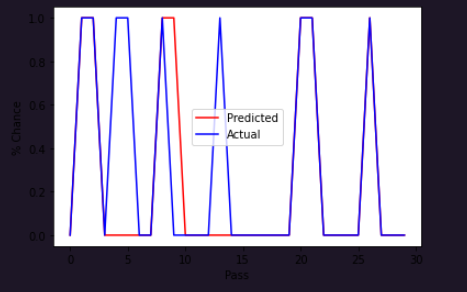

# **Predicting The Result**